In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#import datetime as dt

pd.set_option('display.max_columns',100)

basket_df = pd.read_csv("Trans_by_Basket_50000_Cust_All_no_XX.csv",parse_dates=[23])

print(basket_df.shape)

basket_df = basket_df.drop(columns = ['basket_id.1','time_id.1','cust_id.1','store_id.1',])


X = basket_df[['store_id','std_quantity','nunique_products',
              'n_products','sum_spend','cust_price_sensitivity',
              'basket_size', 'basket_price_sensitivity',
             'basket_type','basket_dominant_mission','store_format','store_region','store_id']]

#X['cust_lifestage'].fillna('OT')

store_df_time = basket_df[['store_id','shop_date','shop_hour']]

#Average shop hour, weekend vs weekday
store_time_agg = pd.DataFrame(columns = ['avg_shop_hr','weekend_proportion'])

#df.groupby('item_id')['date'].diff()
store_time_agg ['avg_shop_hr'] = store_df_time.groupby('store_id')['shop_hour'].mean()
store_df_time['day_of_week'] = basket_df['shop_date'].dt.dayofweek
store_df_time['weekday'] = (store_df_time['day_of_week'] < 5).astype(int)
store_df_time['weekend'] = (store_df_time['day_of_week'] > 4).astype(int)
store_time_agg['weekend_proportion'] = (store_df_time.groupby('store_id')['weekday'].sum()/5) - (store_df_time.groupby('store_id')['weekend'].sum()/2)

#Groupby Customer
scaler = StandardScaler()

# Need to Dummy my variables first

#X = basket_df[['store_id','std_quantity','nunique_products',
#              'n_products','sum_spend','cust_price_sensitivity',
#              'basket_size', 'basket_price_sensitivity',
#             'basket_type','basket_dominant_mission','store_format','store_region']]

#X['cust_lifestage'].fillna('OT')

#Groupby Customer
scaler = StandardScaler()

# Need to Dummy my variables first

X_cat = X[['cust_price_sensitivity',
              'basket_size', 'basket_price_sensitivity',
             'basket_type','basket_dominant_mission','store_format']]
X_num = X[['std_quantity','nunique_products','n_products','sum_spend']]

X_dum = pd.get_dummies(X_cat)
#X_num_scale = pd.DataFrame(scaler.fit_transform(X_num),columns=['std_quantity','nunique_products','n_products','sum_spend'])
           
X_all = pd.concat([X_num,X_dum],axis=1)

X_all = pd.concat([basket_df['store_id'],X_all],axis=1)

X_all_store_grp  = X_all.groupby('store_id').agg({ 'std_quantity' : ['mean'],
                            'nunique_products' : ['mean'],
                            'n_products': ['mean'],
                            'sum_spend': ['mean','max'],
                            'cust_price_sensitivity_LA': ['sum','count'],
                            'cust_price_sensitivity_MM': ['sum'],
                            'cust_price_sensitivity_UM': ['sum'],
                            'basket_size_L' : [ 'sum','count'],
                            'basket_size_M' : [ 'sum'],
                            'basket_size_S' : [ 'sum'],
                            'basket_price_sensitivity_LA' : [ 'sum'],
                            'basket_price_sensitivity_MM' : [ 'sum'],
                            'basket_price_sensitivity_UM' : [ 'sum'],
                            'basket_type_Full Shop' : [ 'sum'], 
                            'basket_type_Small Shop': [ 'sum'], 
                            'basket_type_Top Up': [ 'sum'],
                            'basket_dominant_mission_Fresh': [ 'sum'],
                            'basket_dominant_mission_Grocery': [ 'sum'],
                            'basket_dominant_mission_Mixed': [ 'sum'],
                            'basket_dominant_mission_Nonfood': [ 'sum'],
                             'store_format_LS':['max'],
                             'store_format_MS':['max'],
                             'store_format_SS':['max'],
                             'store_format_XLS':['max']})

X_all_store_grp.columns = ["_".join(x) for x in X_all_store_grp.columns.ravel()]

sum_columns = ['cust_price_sensitivity_LA_sum', 
               'cust_price_sensitivity_MM_sum', 
               'cust_price_sensitivity_UM_sum', 
               'basket_size_L_sum', 
               'basket_size_M_sum', 
               'basket_size_S_sum', 
               'basket_price_sensitivity_LA_sum', 
               'basket_price_sensitivity_MM_sum', 
               'basket_price_sensitivity_UM_sum',
               'basket_type_Full Shop_sum', 
               'basket_type_Small Shop_sum', 
               'basket_type_Top Up_sum', 
               'basket_dominant_mission_Fresh_sum',
               'basket_dominant_mission_Grocery_sum',
               'basket_dominant_mission_Mixed_sum',
               'basket_dominant_mission_Nonfood_sum']

for col in sum_columns:
    X_all_store_grp[col] = X_all_store_grp[col] / X_all_store_grp['basket_size_L_count']

X_all_store_grp.rename(columns={"basket_size_L_count": "basket_count"})

#X_all_store_grp = pd.concat([X_all_store_grp,store_time_agg],axis=1)

X_all_store_grp.head()

X_all_store_grp_scale = pd.DataFrame(scaler.fit_transform(X_all_store_grp),
                                    columns=X_all_store_grp.columns)

X_all_store_grp_scale = X_all_store_grp_scale.dropna()

(50000, 25)


/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [3]:
X_all_store_grp

,std_quantity_mean,nunique_products_mean,n_products_mean,sum_spend_mean,sum_spend_max,cust_price_sensitivity_LA_sum,cust_price_sensitivity_LA_count,cust_price_sensitivity_MM_sum,cust_price_sensitivity_UM_sum,basket_size_L_sum,basket_size_L_count,basket_size_M_sum,basket_size_S_sum,basket_price_sensitivity_LA_sum,basket_price_sensitivity_MM_sum,basket_price_sensitivity_UM_sum,basket_type_Full Shop_sum,basket_type_Small Shop_sum,basket_type_Top Up_sum,basket_dominant_mission_Fresh_sum,basket_dominant_mission_Grocery_sum,basket_dominant_mission_Mixed_sum,basket_dominant_mission_Nonfood_sum,store_format_LS_max,store_format_MS_max,store_format_SS_max,store_format_XLS_max
store_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
STORE00001,0.312852,4.863636,6.363636,7.620909,34.49,0.181818,22,0.681818,0.136364,0.318182,22,0.227273,0.454545,0.272727,0.727273,0.000000,0.045455,0.590909,0.363636,0.500000,0.363636,0.136364,0.000000,1,0,0,0
STORE00002,0.338906,2.942308,4.000000,4.883654,33.57,0.000000,52,0.923077,0.076923,0.057692,52,0.557692,0.384615,0.442308,0.403846,0.115385,0.019231,0.788462,0.192308,0.153846,0.384615,0.269231,0.192308,1,0,0,0
STORE00003,0.318183,3.636364,5.454545,13.030000,36.60,0.454545,11,0.181818,0.363636,0.181818,11,0.545455,0.272727,0.272727,0.636364,0.090909,0.090909,0.636364,0.090909,0.272727,0.272727,0.272727,0.000000,1,0,0,0
STORE00004,1.070744,19.434783,31.086957,41.093913,88.68,0.978261,46,0.021739,0.000000,0.913043,46,0.065217,0.021739,0.826087,0.173913,0.000000,0.586957,0.086957,0.326087,0.434783,0.043478,0.521739,0.000000,0,1,0,0
STORE00006,0.335288,8.934783,12.173913,16.992174,176.10,0.206522,92,0.760870,0.000000,0.195652,92,0.489130,0.315217,0.315217,0.543478,0.141304,0.163043,0.750000,0.086957,0.597826,0.076087,0.315217,0.010870,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STORE02883,0.580732,7.579710,10.855072,17.039130,83.99,0.000000,69,0.637681,0.362319,0.434783,69,0.333333,0.231884,0.115942,0.695652,0.159420,0.188406,0.478261,0.333333,0.478261,0.173913,0.289855,0.057971,0,1,0,0
STORE02889,0.267453,4.722222,5.833333,6.818333,25.80,0.055556,18,0.888889,0.055556,0.166667,18,0.388889,0.444444,0.333333,0.388889,0.277778,0.111111,0.666667,0.222222,0.444444,0.222222,0.333333,0.000000,1,0,0,0
STORE02890,0.157345,3.764706,4.117647,7.217647,14.29,0.000000,17,0.000000,1.000000,0.058824,17,0.705882,0.235294,0.000000,0.176471,0.823529,0.000000,0.764706,0.235294,0.823529,0.000000,0.176471,0.000000,0,1,0,0


In [4]:
import itertools

#X_all_cust_grp.drop(columns='cust_id')

model_iterator = itertools.product({'average', 'single', 'complete'}, range(2,10))

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#X_all_cust_grp_scale = pd.DataFrame(scaler.fit_transform(X_all_cust_grp),
#                                    columns=X_all_cust_grp.columns)

agg_model_list = [ AgglomerativeClustering(affinity = 'cosine', linkage = linkage, 
                  n_clusters = number).fit(X_all_store_grp_scale) for linkage,number in model_iterator]

agg_model_sil_list = [silhouette_score(X_all_store_grp_scale,model.labels_, metric = 'cosine') for model in agg_model_list]

model_iterator = itertools.product({'average', 'single', 'complete'}, range(2,10))

agg_model_all_df = pd.DataFrame(model_iterator, columns =['linkage','n_comp'])

agg_model_all_df['sil'] = agg_model_sil_list 

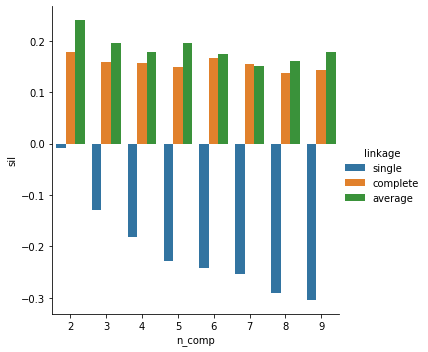

In [5]:
sns.catplot(x='n_comp',y='sil', hue= 'linkage',data=agg_model_all_df,kind='bar')

In [6]:
best_agg_model = AgglomerativeClustering(affinity = 'cosine', linkage = 'average', 
                  n_clusters = 2).fit(X_all_store_grp_scale) 

X_zero = X_all_store_grp_scale.iloc[best_agg_model.labels_==0]

X_one = X_all_store_grp_scale.iloc[best_agg_model.labels_==1]

#X_two = X_all_cust_grp.iloc[best_agg_model.labels_==2]

#print(X_zero.describe().T)

#print(X_one.describe().T)

print(X_zero.shape[0])
print(X_one.shape[0])

A = (X_zero.describe().T/X_zero.shape[0] - X_one.describe().T/X_one.shape[0])*(X_zero.shape[0]+X_one.shape[0])

print(A.sort_values(by ='mean', ascending=False))

318
356
                                     count      mean       std       min  \
basket_size_L_sum                      0.0  2.707799  1.079197 -0.228142   
n_products_mean                        0.0  2.524705  1.409341  0.171925   
nunique_products_mean                  0.0  2.517714  1.330335  0.116982   
sum_spend_mean                         0.0  2.483420  1.272360  0.426890   
basket_type_Top Up_sum                 0.0  2.215981  0.586848 -0.271844   
std_quantity_mean                      0.0  1.960333  0.704064 -0.282737   
basket_type_Full Shop_sum              0.0  1.891713  2.051032 -0.129288   
sum_spend_max                          0.0  1.835126  0.574590  0.018659   
basket_dominant_mission_Mixed_sum      0.0  1.290245  0.307155 -0.243379   
cust_price_sensitivity_LA_count        0.0  1.232886  1.615315 -0.139542   
basket_size_L_count                    0.0  1.232886  1.615315 -0.139542   
basket_price_sensitivity_UM_sum        0.0  1.153841  0.448332 -0.250534   
cust

In [7]:
basket_df.head()

,basket_id,cust_id,time_id,store_id,std_quantity,nunique_products,n_products,sum_spend,cust_price_sensitivity,cust_lifestage,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region,shop_week,date_from,date_to,shop_date,shop_hour
0,994111700818612,CUST0000999786,11463,STORE01125,0.0,1,1,1.66,MM,OT,S,MM,Small Shop,Fresh,MS,S02,200819.0,20080630.0,20080706.0,2008-07-05,8.0
1,994111300819473,CUST0000999786,11002,STORE01125,0.0,3,3,4.03,MM,OT,M,LA,Small Shop,Fresh,MS,S02,200815.0,20080602.0,20080608.0,2008-06-08,15.0
2,994111300819474,CUST0000999786,11040,STORE01125,0.0,2,2,1.89,MM,OT,S,MM,Small Shop,Mixed,MS,S02,200815.0,20080602.0,20080608.0,2008-06-07,18.0
3,994110800817608,CUST0000999786,10540,STORE02260,0.0,3,3,1.95,MM,OT,M,LA,Small Shop,Mixed,MS,S03,200810.0,20080428.0,20080504.0,2008-05-01,10.0
4,994110800817609,CUST0000999786,10584,STORE02260,1.0,2,4,2.43,MM,OT,M,MM,Small Shop,Nonfood,MS,S03,200810.0,20080428.0,20080504.0,2008-04-28,10.0


In [8]:
X_all = pd.concat([X_num,X_dum],axis=1)
X_all['weekend'] = (basket_df['shop_date'].dt.dayofweek > 3).astype(int)
X_all_wkd_grp = X_all.groupby('weekend').sum()

X_all_wkd_grp.head()

,std_quantity,nunique_products,n_products,sum_spend,cust_price_sensitivity_LA,cust_price_sensitivity_MM,cust_price_sensitivity_UM,cust_price_sensitivity_XX,basket_size_L,basket_size_M,basket_size_S,basket_price_sensitivity_LA,basket_price_sensitivity_MM,basket_price_sensitivity_UM,basket_price_sensitivity_XX,basket_type_Full Shop,basket_type_Small Shop,basket_type_Top Up,basket_type_XX,basket_dominant_mission_Fresh,basket_dominant_mission_Grocery,basket_dominant_mission_Mixed,basket_dominant_mission_Nonfood,basket_dominant_mission_XX,store_format_LS,store_format_MS,store_format_SS,store_format_XLS
weekend,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,16163.580690,189366,275357,353123.70,7861.0,11850.0,9203.0,191.0,9632.0,11462.0,8011.0,6076.0,14598.0,7573.0,858.0,3371.0,15825.0,9240.0,669.0,14954.0,4785.0,7026.0,1671.0,669.0,17174.0,6417.0,3424.0,2090.0
1,11953.724494,140029,203136,257570.83,5710.0,8543.0,6642.0,0.0,7144.0,8407.0,5344.0,4562.0,10587.0,5746.0,0.0,2434.0,11505.0,6956.0,0.0,11173.0,3643.0,5068.0,1011.0,0.0,12172.0,4589.0,2525.0,1609.0


In [9]:
comp = (X_all_wkd_grp.loc[0]/4)/(X_all_wkd_grp.loc[1]/3)

comp.sort_values(ascending=False)

basket_dominant_mission_XX              inf
basket_type_XX                          inf
cust_price_sensitivity_XX               inf
basket_price_sensitivity_XX             inf
basket_dominant_mission_Nonfood    1.239614
basket_size_S                      1.124298
store_format_LS                    1.058207
store_format_MS                    1.048758
cust_price_sensitivity_MM          1.040325
basket_dominant_mission_Mixed      1.039759
cust_price_sensitivity_UM          1.039182
basket_type_Full Shop              1.038722
basket_price_sensitivity_MM        1.034146
cust_price_sensitivity_LA          1.032531
basket_type_Small Shop             1.031617
sum_spend                          1.028233
basket_size_M                      1.022541
store_format_SS                    1.017030
n_products                         1.016648
nunique_products                   1.014251
std_quantity                       1.014135
basket_size_L                      1.011198
basket_dominant_mission_Fresh   

In [10]:
#X_all = pd.concat([X_num,X_dum],axis=1)
X_all['shop_working_hours'] = ((basket_df['shop_hour'] > 9) & (basket_df['shop_hour'] < 17) & (X_all['weekend'] == 0) ).astype(int)
X_all_swh_grp = X_all.groupby('shop_working_hours').sum()

X_all_swh_grp.head()

comp = X_all_swh_grp.loc[0]/X_all_swh_grp.loc[1]

comp.sort_values(ascending=False)

weekend                                 inf
basket_dominant_mission_XX              inf
cust_price_sensitivity_XX               inf
basket_type_XX                          inf
basket_price_sensitivity_XX             inf
basket_dominant_mission_Nonfood    2.668947
store_format_XLS                   2.486334
basket_size_S                      2.327934
basket_dominant_mission_Grocery    2.325967
store_format_SS                    2.234910
cust_price_sensitivity_LA          2.152381
basket_type_Small Shop             2.135613
store_format_MS                    2.114318
basket_size_M                      2.103561
cust_price_sensitivity_UM          2.085086
basket_price_sensitivity_MM        2.082619
basket_dominant_mission_Mixed      2.031838
cust_price_sensitivity_MM          2.027464
store_format_LS                    2.012009
sum_spend                          1.996178
basket_price_sensitivity_UM        1.993034
basket_price_sensitivity_LA        1.990723
basket_type_Top Up              

In [11]:
X_all['shop_working_hours_wkd'] = ((basket_df['shop_hour'] > 9) & (basket_df['shop_hour'] < 17) & (X_all['weekend'] == 1) ).astype(int)
X_all_swhw_grp = X_all.groupby('shop_working_hours_wkd').sum()

X_all_swhw_grp.head()

comp = X_all_swhw_grp.loc[0]/X_all_swhw_grp.loc[1]

comp.sort_values(ascending=False)

shop_working_hours                      inf
basket_dominant_mission_XX              inf
cust_price_sensitivity_XX               inf
basket_type_XX                          inf
basket_price_sensitivity_XX             inf
basket_dominant_mission_Nonfood    3.500000
basket_size_S                      3.469545
store_format_XLS                   3.387900
basket_dominant_mission_Grocery    3.300000
basket_type_Small Shop             3.200738
store_format_MS                    3.191165
basket_dominant_mission_Mixed      3.160303
cust_price_sensitivity_UM          3.144651
store_format_SS                    3.139875
basket_size_M                      3.123910
cust_price_sensitivity_MM          3.102394
basket_price_sensitivity_MM        3.093125
cust_price_sensitivity_LA          3.085190
store_format_LS                    3.070180
basket_price_sensitivity_LA        3.068069
sum_spend                          3.000725
basket_price_sensitivity_UM        2.978196
basket_type_Full Shop           

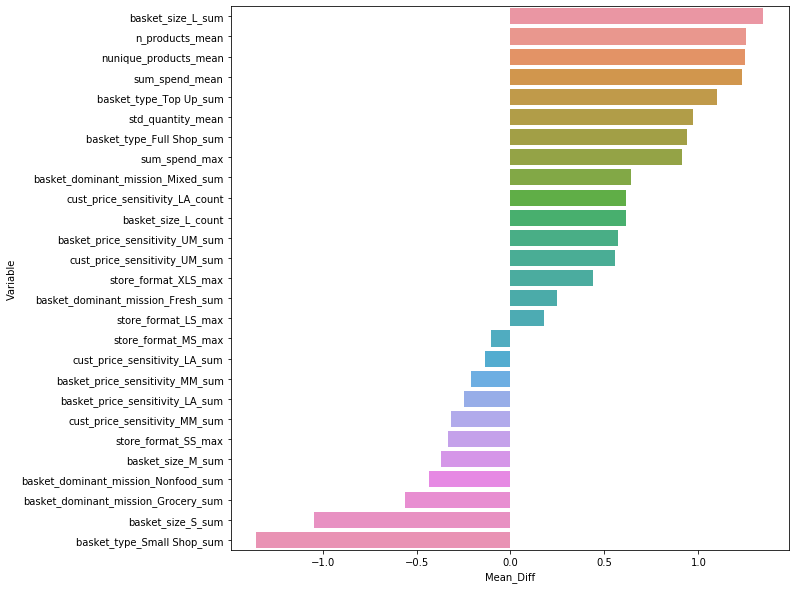

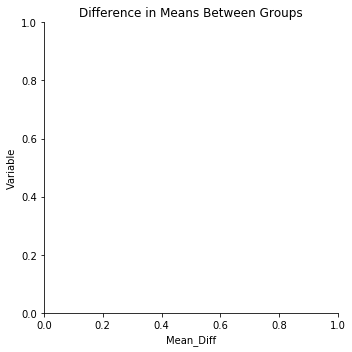

In [13]:
import scipy.stats as stats

results = [] ; 

for var in X_zero.describe().T.index:
    
    mean_diff = X_zero[var].mean() - X_one[var].mean()

    results.append([var,X_zero[var].mean(),X_one[var].mean(), mean_diff, stats.f_oneway(X_zero[var], X_one[var])[0],stats.f_oneway(X_zero[var], X_one[var])[1] ])

results_df = pd.DataFrame(results,columns = ['Variable','Group_1_mean','Group_2_mean','Mean_Diff','Fstat','P_value'])

results_df = results_df.sort_values(by = 'Mean_Diff', ascending=False)

fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)

chart = sns.catplot(x='Mean_Diff',y='Variable',data=results_df,kind='bar', ax=ax)
plt.title('Difference in Means Between Groups')
plt.xticks(
    #rotation=90, 
    horizontalalignment='center',
    #linespacing='2',
    fontweight='light',
    fontsize='medium'  
)

plt.tight_layout()
plt.show()